In [21]:
import tensorflow as tf
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np

import deepface_functions as df
import deepface_models as dm
import cv2
from adversarial_pattern_generator import cleanup_dims
import image_helper_functions as imh
import random
import json

In [12]:
import os
os.chdir('C:/Users/matta/Desktop/Capstone/')
os.getcwd()

'C:\\Users\\matta\\Desktop\\Capstone'

In [13]:
train_df = pd.read_csv("Fairfacedb/fairface_label_train.csv")
test_df = pd.read_csv("Fairfacedb/fairface_label_train.csv")

train_df = train_df.astype({'file':str})
test_df = test_df.astype({'file':str})

train_df.rename(columns = {'race':'ethnicity'}, inplace=True)
test_df.rename(columns = {'race':'ethnicity'}, inplace=True)

train_df['emotion'] = 'neutral'
test_df['emotion'] = 'neutral'

train_df.set_index('file', inplace=True, drop=True)
test_df.set_index('file', inplace=True, drop=True)

train_df = train_df.drop(columns=['service_test'])
test_df = test_df.drop(columns=['service_test'])

train_df.head()

,age,gender,ethnicity,emotion
file,,,,
train/1.jpg,50-59,Male,East Asian,neutral
train/2.jpg,30-39,Female,Indian,neutral
train/3.jpg,3-9,Female,Black,neutral
train/4.jpg,20-29,Female,Indian,neutral
train/5.jpg,20-29,Female,Indian,neutral


In [14]:
females = train_df[train_df['gender'] == 'Female']
males = train_df[train_df['gender'] == 'Male']

females.head()

,age,gender,ethnicity,emotion
file,,,,
train/2.jpg,30-39,Female,Indian,neutral
train/3.jpg,3-9,Female,Black,neutral
train/4.jpg,20-29,Female,Indian,neutral
train/5.jpg,20-29,Female,Indian,neutral
train/8.jpg,30-39,Female,Indian,neutral


In [10]:
""" male_json = males.to_dict(orient='index')

with open("Males_train.json", "w") as outfile:
    json.dump(male_json, outfile)

female_json = females.to_dict(orient='index')

with open("Females_train.json", "w") as outfile:
    json.dump(female_json, outfile) """

In [15]:
random.seed(0)

images = os.listdir('Fairfacedb/train')
rand_images = pd.Index(np.random.choice(females.index, 1000))
fem_output = []
with open("Females_train.json", 'r') as f:
    data = json.load(f)
    for img in rand_images:
        temp =  cv2.imread(os.path.join('Fairfacedb', img))
        fem_output.append([temp, data[img]['ethnicity'], data[img]['gender'], data[img]['age'], data[img]['emotion'], img])

In [16]:
random.seed(0)

images = os.listdir('Fairfacedb/train')
rand_images = pd.Index(np.random.choice(males.index, 1000))
men_output = []
with open("Males_train.json", 'r') as f:
    data = json.load(f)
    for img in rand_images:
        temp =  cv2.imread(os.path.join('Fairfacedb', img))
        men_output.append([temp, data[img]['ethnicity'], data[img]['gender'], data[img]['age'], data[img]['emotion'], img])

In [22]:
import matplotlib.pyplot as plt
e = dm.attributeModel('gender')
cman = 0
cwoman = 0

for image in fem_output:
    prep_img = image
    final_img = prep_img[0]
    results = e.predict_verbose(cleanup_dims(final_img))
    if results['dominant_gender'] == 'Man':
        cman += 1
    else:
        cwoman += 1

print(cman, cwoman)

597 403


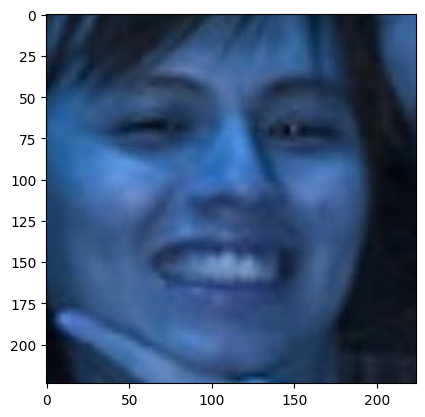

In [23]:
plt.imshow(fem_output[0][0])